### Topic 2 DQ 1

"Many real-world datasets exhibit outliers or extreme values. Discuss the potential impact of outliers on measures of central tendency and variability, and propose at least two methods for identifying and handling outliers in data analysis. How can Python be used to implement these methods? Provide examples from real-world datasets to illustrate your points."


## Impact of Outliers on Statistical Measures

Outliers or *extreme* values in datasets can significantly impact statistical analyses, particularly measures of central tendency (our best friends--mean, median, mode) and variability (range, variance, standard deviation). Understanding and managing outliers is crucial for accurate data analysis.

Mean: Outliers can skew the mean, making it not representative of the data.
Median: Less affected by outliers, making it a more robust measure of central tendency in skewed distributions.
Mode: Unaffected by outliers, as it simply represents the most frequent value.
Variance and Standard Deviation: Sensitive to outliers, as they square the differences from the mean, exaggerating the impact of extreme values.

In [8]:
#Use pandas to load your dataset from a CSV file.

import pandas as pd

data = pd.read_csv('dog_breeds.csv')
data['avg_height_male'] = data['min_height_male'] + data['max_height_male'] / 2
data['avg_height_female'] = data['min_height_female'] + data['max_height_female'] / 2
data['avg_breed_height'] = data['avg_height_male'] + data['avg_height_female'] / 2

print(data['avg_breed_height'])

0     149.500
1      52.500
2      18.750
3      52.125
4      69.000
       ...   
93     41.250
94     47.250
95     24.000
96     16.500
97     26.250
Name: avg_breed_height, Length: 98, dtype: float64


### Interquartile Range (IQR) Method
The IQR is the difference between the 75th and 25th percentiles. Observations that fall below Q1 - 1.5xIQR or above Q3 + 1.5xIQR are considered outliers.

In [9]:
#Use the Interquartile Range (IQR) to identify outliers.

Q1 = data['avg_breed_height'].quantile(0.25)
Q3 = data['avg_breed_height'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['avg_breed_height'] < (Q1 - 1.5 * IQR)) | (data['avg_breed_height'] > (Q3 + 1.5 * IQR))]
print(outliers)

                        Name  min_life_expectancy  max_life_expectancy  \
0  fictional breed (massive)                    8                   10   

   max_height_male  max_height_female  max_weight_male  max_weight_female  \
0             72.0               70.0             50.0               50.0   

   min_height_male  min_height_female  min_weight_male  ...  coat_length  \
0             65.0               62.0             40.0  ...            1   

   good_with_strangers  playfulness  protectiveness  trainability  energy  \
0                    3            4               3             5       4   

   barking  avg_height_male  avg_height_female  avg_breed_height  
0        3            101.0               97.0             149.5  

[1 rows x 26 columns]


### Z-Score Method
The Z-score measures the number of standard deviations an observation is from the mean. Observations with a Z-score greater than 3 or less than -3 are often considered outliers

In [10]:
# Identify outliers using Z-score
# We can use numpy to standardize the data and scipy to calculate the Z-scores.

import numpy as np
import scipy.stats as stats

z_scores = np.abs(stats.zscore(data['avg_breed_height']))
outliers_z = data[z_scores > 3]

print(outliers_z)

                        Name  min_life_expectancy  max_life_expectancy  \
0  fictional breed (massive)                    8                   10   

   max_height_male  max_height_female  max_weight_male  max_weight_female  \
0             72.0               70.0             50.0               50.0   

   min_height_male  min_height_female  min_weight_male  ...  coat_length  \
0             65.0               62.0             40.0  ...            1   

   good_with_strangers  playfulness  protectiveness  trainability  energy  \
0                    3            4               3             5       4   

   barking  avg_height_male  avg_height_female  avg_breed_height  
0        3            101.0               97.0             149.5  

[1 rows x 26 columns]


In [11]:
#You can remove outliers or adjust them using transformations.
data_clean = data[~((data['avg_breed_height'] < (Q1 - 1.5 * IQR)) | (data['avg_breed_height'] > (Q3 + 1.5 * IQR)))]
#print(data_clean)

A boxplot is an effective visual tool for identifying outliers, as it visually represents the distribution of the data, the IQR, and any points that fall outside the whiskers as potential outliers.

<Axes: xlabel='avg_breed_height'>

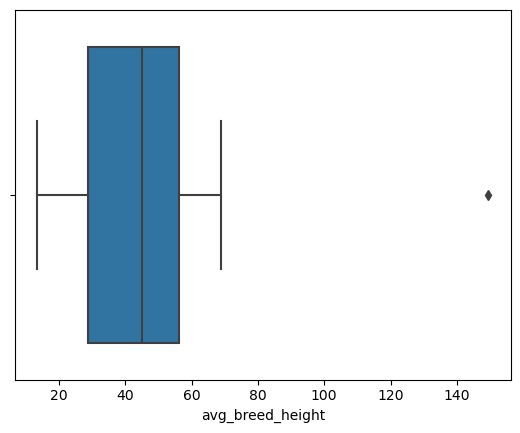

In [12]:
#Use seaborn for visual representation.
import seaborn as sns

sns.boxplot(x=data['avg_breed_height'])


<Axes: xlabel='avg_breed_height'>

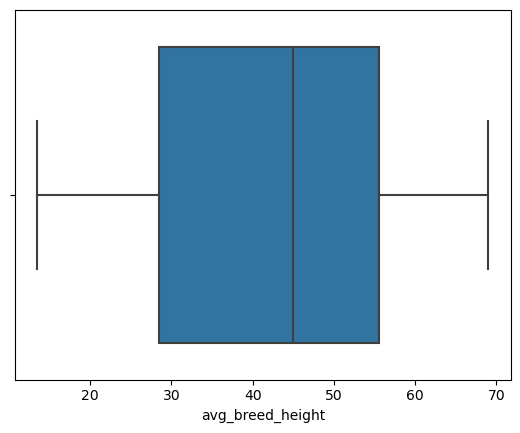

In [13]:
sns.boxplot(x=data_clean['avg_breed_height'])

In [14]:
# Compute measures of central tendency and variability on the cleaned dataset.

mean_val = data_clean['avg_breed_height'].mean()
median_val = data_clean['avg_breed_height'].median()
std_dev = data_clean['avg_breed_height'].std()
print("Mean: " + str(mean_val))
print("Median: " + str(median_val))
print("Standard Deviation: " + str(std_dev))

Mean: 42.58376288659794
Median: 45.0
Standard Deviation: 15.162603067644474


### Sources 

Kaggle user Warcoder. (n.d.). Dog Breeds Details. Kaggle. Retrieved Feb. 2024, from https://www.kaggle.com/datasets/warcoder/dog-breeds-details

Kaur, J. (2019). Detecting outliers: Use absolute deviation around the median but do not use standard deviation around the mean. Journal of Emerging Technologies and Innovative Research (JETIR), 6(3). Retrieved from www.jetir.org (ISSN-2349-5162)

Rogel-Salazar, J. (2023). The Measure of All Things - Statistics. In Statistics and data visualisation with Python (1st ed.). CRC Press.

Zequera RAG, Rassolkin A, Vaimann T, Kallaste A. Clustering and Outlier Analysis for Key Performance Indicators in Battery Energy Storage Systems applications. 2023 IEEE 17th International Conference on Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), 2023 IEEE 17th International Conference on. June 2023:1-6. doi:10.1109/CPE-POWERENG58103.2023.10227417

This Jupiter notebook was created with the help of shcolarly articles given by ChatGPT4. (2024)